In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white")
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
vert_boostnames = ['Boost\nRegex', '3-Way\nSplit', 'Multi-\nWay\nSplit', 'BLARE']
vert_re2names = ['RE2', '3-Way\nSplit', 'Multi-\nWay\nSplit', 'BLARE']
vert_pcre2names = ['PCRE2', '3-Way\nSplit', 'Multi-\nWay\nSplit', 'BLARE']
vert_icunames = ['ICU\nRegex', '3-Way\nSplit', 'Multi-\nWay\nSplit', 'BLARE']

hori_boostnames = ['Boost\nRegex', '3-Way\nSplit', 'Multi-Way\nSplit', 'BLARE']
hori_re2names = ['RE2', '3-Way\nSplit', 'Multi-Way\nSplit', 'BLARE']
hori_pcre2names = ['PCRE2', '3-Way\nSplit', 'Multi-Way\nSplit', 'BLARE']
hori_icunames = ['ICU\nRegex', '3-Way\nSplit', 'Multi-Way\nSplit', 'BLARE']
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

colors = sns.color_palette('colorblind', 4)
colors = [colors[1], colors[2], colors[3], colors[0]]

In [5]:
def plot_box(df, engine, dataset):
    fig, ax = plt.subplots(figsize=[9.6, 4.2])
    ax.set_xscale('log')
    locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
    ax.xaxis.set_minor_locator(locmin)
    ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
    ax.get_xaxis().set_minor_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
    plt.setp(ax.get_xticklabels(), horizontalalignment='left')

    if engine == 're2':
        label_names = vert_re2names
    elif engine == 'pcre2':
        label_names = vert_pcre2names
    elif engine == 'boost':
        label_names = vert_boostnames
    elif engine == 'icu':
        label_names = vert_icunames
    
    label_names = list(reversed(label_names))
    methods = list(reversed(df.columns))
    curr_colors = list(reversed(colors))
    poss = list(range(1,5))
    
    for method, label_name, pos, color in zip(methods, label_names, poss, curr_colors):       
        bp = ax.boxplot(df[method], positions=[pos], labels=[label_name], vert=False, widths=0.5, showfliers=True, patch_artist=True,  # fill with color
                     flierprops={"marker":"o", "markerfacecolor":color, "markeredgecolor":color, "markersize":"6", "alpha":0.4})

        bp['boxes'][0].set_facecolor(color) 
        bp['medians'][0].set_color('black')

    # ax.set_ylabel('Method')
    ax.set_xlabel('Per Regex Running Time (s) in Log Scale', labelpad=10)

    plt.tight_layout()

    plt.savefig(f'png_fig/new_{engine}MultiBox{dataset}.png', bbox_inches='tight')
    plt.savefig(f'pdf_fig/new_{engine}MultiBox{dataset}.pdf', bbox_inches='tight')

    plt.show()

In [6]:
def plot_bar(data, engine, dataset):
    if engine == 're2':
        label_names = hori_re2names
    elif engine == 'pcre2':
        label_names = hori_pcre2names
    elif engine == 'boost':
        label_names = hori_boostnames
    elif engine == 'icu':
        label_names = hori_icunames
    
    fig, ax = plt.subplots(figsize=[5, 3.9])
    bars = ax.bar(label_names, data.iloc[0], color=colors, edgecolor='black')
    ax.bar_label(bars, labels=['baseline', 
                               r'{:.1f}$\times$'.format(data.iloc[0]['mid_direct_time']/data.iloc[0]['mid_sm_time']), 
                               r'{:.1f}$\times$'.format(data.iloc[0]['mid_direct_time']/data.iloc[0]['mid_multi_split_time']), 
                               r'{:.1f}$\times$'.format(data.iloc[0]['mid_direct_time']/data.iloc[0]['mid_blare_time']),
                              ])

    # ax.set_xlabel('Method', labelpad=10)
    plt.ylim(0, np.max(np.array(data.iloc[0]))*1.1)
    plt.tight_layout()

    plt.ylabel('Total Running Time (s)')
    plt.savefig(f'new_{engine}Multi{dataset}.png', bbox_inches='tight')
    plt.savefig(f'new_{engine}Multi{dataset}.pdf', bbox_inches='tight')
    plt.show()

In [10]:
# google-re2 traffic
df3 = pd.read_csv('re2_traffic.csv', sep='\t')

In [11]:
df = df3.dropna(how='any', subset=['regex', 'match_num_direct'] , axis=0)[['mid_direct_time', 'mid_sm_time', 'mid_multi_split_time', 'mid_blare_time']]
data = df.sum(axis=0).to_frame().transpose()

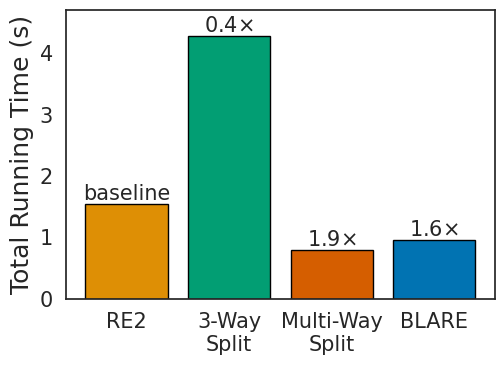

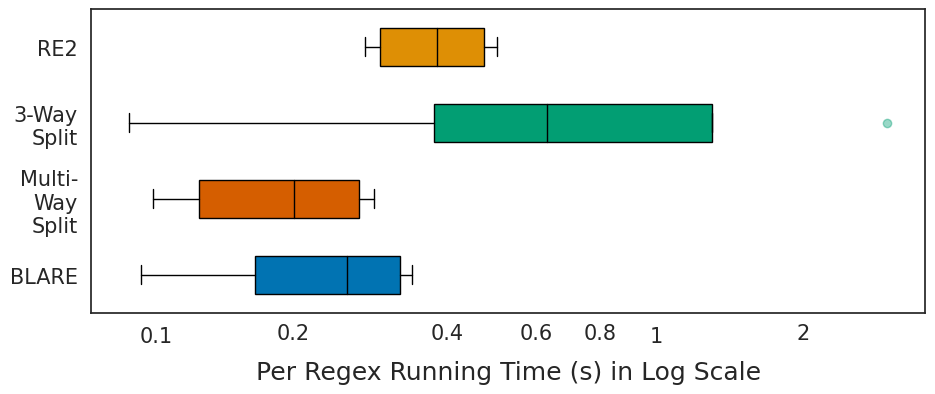

In [12]:
plot_bar(data, 're2', 'Traffic')
plot_box(df, 're2', 'Traffic')